In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
content = pd.read_csv('data/movie_titles3.csv', index_col=False, names = ['id', 'year', 'title'])
content.head()

/var/folders/xc/4fn08svj2dgdk_3wj3xkp_rr0000gn/T/ipykernel_4199/3666075594.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  content = pd.read_csv('data/movie_titles3.csv', index_col=False, names = ['id', 'year', 'title'])


,id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [3]:
content['year'].describe()

count    17763.000000
mean      1990.263694
std         16.507891
min       1896.000000
25%       1985.000000
50%       1997.000000
75%       2002.000000
max       2005.000000
Name: year, dtype: float64

In [4]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      17770 non-null  int64  
 1   year    17763 non-null  float64
 2   title   17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


# Year Release

I'm assuming that people identify heavily with the content that they grew up with or a certain styles of content. For that reason, I'm going to bin films by decade.

However, considering the low outliers anything before 1960 will be binned together. Q1 - 1.5IQR

In [34]:
def decade(row):
    
    """
    bins years by decade, 1959 and before are binned together
    """
    if row['year'] <= 1959:
        return str(0)
    elif 1960 <= row['year'] < 1969:
        return str(1960)
    elif 1970 <= row['year'] < 1979:
        return str(1970)
    elif 1980 <= row['year'] < 1989:
        return str(1980)
    elif 1990 <= row['year'] < 1999:
        return str(1990)
    else:
        return str(2000)

In [32]:
#bin years

content['decade'] = content.apply(decade, axis=1)
content

,id,year,title,decade
0,1,2003.0,Dinosaur Planet,2000
1,2,2004.0,Isle of Man TT 2004 Review,2000
2,3,1997.0,Character,1990
3,4,1994.0,Paula Abdul's Get Up & Dance,1990
4,5,2004.0,The Rise and Fall of ECW,2000
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,2000
17766,17767,2004.0,Fidel Castro: American Experience,2000
17767,17768,2000.0,Epoch,2000
17768,17769,2003.0,The Company,2000


In [27]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      17770 non-null  int64  
 1   year    17763 non-null  float64
 2   title   17770 non-null  object 
 3   decade  17770 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 555.4+ KB


In [35]:
# decade counts
content['decade'].value_counts(sort=True)

decade
2000    8459
1990    4208
1980    1860
0       1246
1970    1151
1960     846
Name: count, dtype: int64

<BarContainer object of 6 artists>

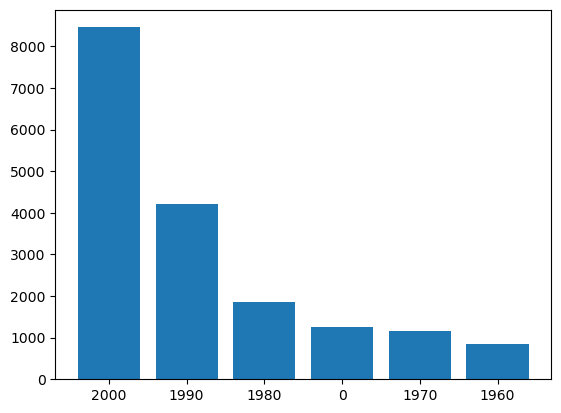

In [30]:
plt.bar((content['decade'].value_counts(sort=True).index), (content['decade'].value_counts(sort=True).values))

In [36]:
content = content.drop(['year'], axis = 1)
content.head()

,id,title,decade
0,1,Dinosaur Planet,2000
1,2,Isle of Man TT 2004 Review,2000
2,3,Character,1990
3,4,Paula Abdul's Get Up & Dance,1990
4,5,The Rise and Fall of ECW,2000


# ratings

importing partial datasets as csvs for ease of use

In [5]:
d1 = pd.read_csv('data/d1_clean.csv')
d1 = d1.drop(['Unnamed: 0'], axis=1)
d1.head()

,Unnamed: 0,mid,cust_id,rating,date,year,month,day,fisc_Q
0,1,1,1488844,3.0,2005-09-06,2005,9,6,4
1,2,1,822109,5.0,2005-05-13,2005,5,13,2
2,3,1,885013,4.0,2005-10-19,2005,10,19,4
3,4,1,30878,4.0,2005-12-26,2005,12,26,4
4,5,1,823519,3.0,2004-05-03,2004,5,3,2


In [9]:
d2 = pd.read_csv('data/d2_clean.csv')
d2 = d2.drop(['Unnamed: 0'], axis=1)
d2.head()

,mid,cust_id,rating,date,year,month,day,fisc_Q
0,4500,2532865,4.0,2005-07-26,2005,7,26,3
1,4500,573364,3.0,2005-06-20,2005,6,20,2
2,4500,1696725,3.0,2004-02-27,2004,2,27,1
3,4500,1253431,3.0,2004-03-31,2004,3,31,1
4,4500,1265574,2.0,2003-09-01,2003,9,1,4


In [10]:
d3 = pd.read_csv('data/d3_clean.csv')
d3 = d3.drop(['Unnamed: 0'], axis = 1)
d3.head()

,mid,cust_id,rating,date,year,month,day,fisc_Q
0,9211,1277134,1.0,2003-12-02,2003,12,2,4
1,9211,2435457,2.0,2005-06-01,2005,6,1,2
2,9211,2338545,3.0,2001-02-17,2001,2,17,1
3,9211,2218269,1.0,2002-12-27,2002,12,27,4
4,9211,441153,4.0,2002-10-11,2002,10,11,4


In [11]:
d4 = pd.read_csv('data/d4_clean.csv')
d4 = d4.drop(['Unnamed: 0'], axis =1)
d4.head()

,mid,cust_id,rating,date,year,month,day,fisc_Q
0,13368,2385003,4.0,2004-07-08,2004,7,8,3
1,13368,659432,3.0,2005-03-16,2005,3,16,1
2,13368,751812,2.0,2002-12-16,2002,12,16,4
3,13368,2625420,2.0,2004-05-25,2004,5,25,2
4,13368,1650301,1.0,2005-08-30,2005,8,30,3


In [23]:
df = pd.concat([d1, d2, d3, d4], axis =0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   mid      int64  
 1   cust_id  int64  
 2   rating   float64
 3   date     object 
 4   year     int64  
 5   month    int64  
 6   day      int64  
 7   fisc_Q   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.0+ GB


In [24]:
df.head()

,mid,cust_id,rating,date,year,month,day,fisc_Q
0,1,1488844,3.0,2005-09-06,2005,9,6,4
1,1,822109,5.0,2005-05-13,2005,5,13,2
2,1,885013,4.0,2005-10-19,2005,10,19,4
3,1,30878,4.0,2005-12-26,2005,12,26,4
4,1,823519,3.0,2004-05-03,2004,5,3,2


In [25]:
#sanity check: where d1 and d2 end, making sure the index is correct
df.iloc[51031354]

mid              9210
cust_id        627867
rating            3.0
date       2005-05-02
year             2005
month               5
day                 2
fisc_Q              2
Name: 51031354, dtype: object

In [29]:
#rename columns bc will eventually have to join info on movieid
df = df.rename(columns = {'date': 'r_date', 'year': 'r_year', 'month': 'r_month', 'fisc_Q': 'r_fiscQ'})
df.head()

,mid,cust_id,rating,r_date,r_year,r_month,day,r_fiscQ
0,1,1488844,3.0,2005-09-06,2005,9,6,4
1,1,822109,5.0,2005-05-13,2005,5,13,2
2,1,885013,4.0,2005-10-19,2005,10,19,4
3,1,30878,4.0,2005-12-26,2005,12,26,4
4,1,823519,3.0,2004-05-03,2004,5,3,2


In [30]:
df['r_year'].value_counts()

r_year
2005    53250073
2004    30206574
2003     9985337
2002     4342871
2001     1769031
2000      924443
1999        2178
Name: count, dtype: int64

<BarContainer object of 7 artists>

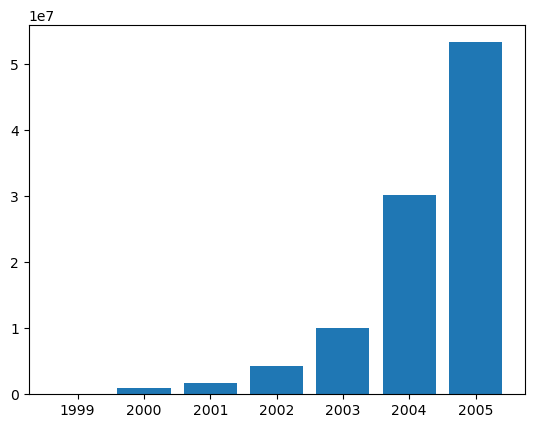

In [31]:
plt.bar((df['r_year'].value_counts(sort=True).index), (df['r_year'].value_counts(sort=True).values))

<BarContainer object of 4 artists>

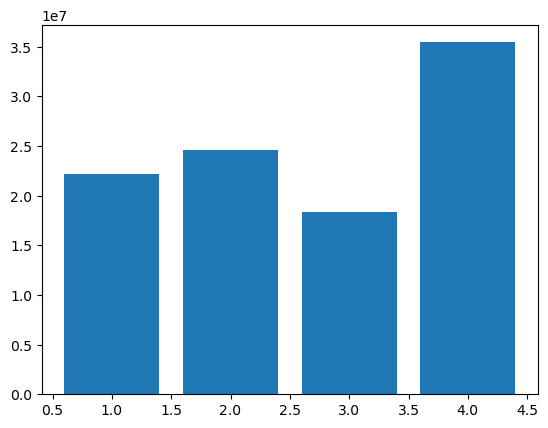

In [33]:
plt.bar((df['r_fiscQ'].value_counts(sort=True).index), (df['r_fiscQ'].value_counts(sort=True).values))

In [35]:
y05 = df[(df['r_year'] == 2005)]
y05['r_month'].value_counts()

r_month
6     5296431
8     5261590
10    5156753
7     4945586
9     4913537
1     4698197
5     4388899
3     4310242
4     4163988
2     4104160
11    3605112
12    2405578
Name: count, dtype: int64

<BarContainer object of 12 artists>

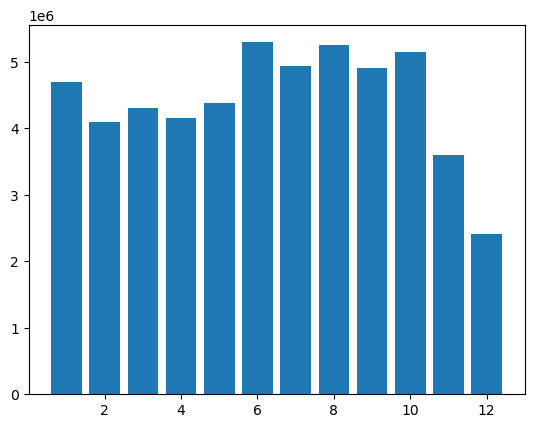

In [36]:
plt.bar((y05['r_month'].value_counts(sort=True).index), (y05['r_month'].value_counts(sort=True).values))

In [37]:
y03 = df[(df['r_year'] == 2003)]
y03['r_month'].value_counts()

r_month
12    1295785
11    1120845
10    1078258
9     1024608
8     1009573
7      878246
6      814454
5      733769
4      552344
3      518642
1      500393
2      458420
Name: count, dtype: int64

<BarContainer object of 12 artists>

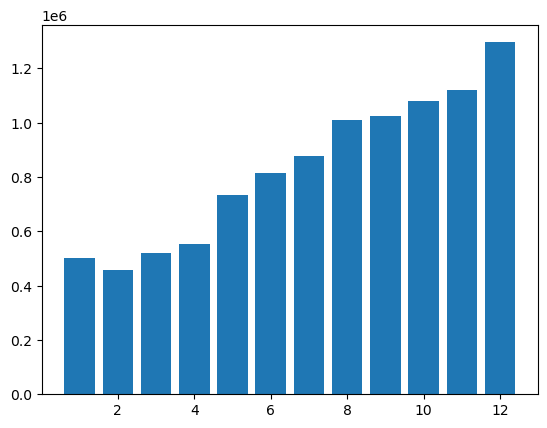

In [38]:
plt.bar((y03['r_month'].value_counts(sort=True).index), (y03['r_month'].value_counts(sort=True).values))

In [40]:
y0 = df[(df['r_year'] == 1999)]
y0['r_month'].value_counts()

r_month
12    2150
11      28
Name: count, dtype: int64

In [41]:
y02 = df[(df['r_year'] == 2002)]
y02['r_month'].value_counts()

r_month
10    456118
11    414100
9     404533
12    393117
8     389445
3     363723
7     355483
4     352683
5     323659
1     314022
6     313797
2     262191
Name: count, dtype: int64

<BarContainer object of 12 artists>

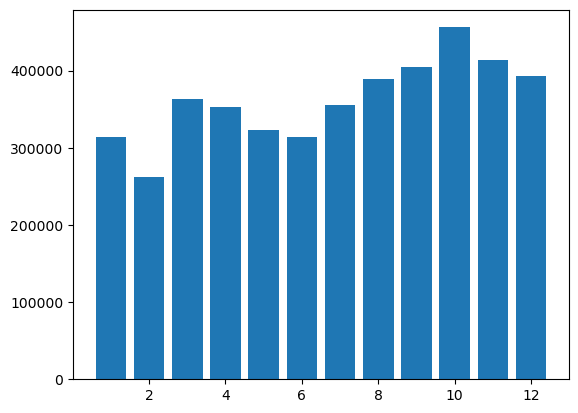

In [42]:
plt.bar((y02['r_month'].value_counts(sort=True).index), (y02['r_month'].value_counts(sort=True).values))

# thoughts on time

After looking at the data, it seems like using time periods to cluster customers might be unreliable. First, these are randomly chosen so it might not represent accurately the distribution of time watched. 

Also, I can't tell from this data whether someone rated the movie at the time of watch or whether they rated it having already watched it. 

I'll leave year and fiscal quarters in because it does provide some context into seasonality. 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   mid      int64  
 1   cust_id  int64  
 2   rating   float64
 3   r_date   object 
 4   r_year   int64  
 5   r_month  int64  
 6   day      int64  
 7   r_fiscQ  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.0+ GB


In [45]:
df = df.drop(['r_month', 'day'], axis=1)
df.head()

,mid,cust_id,rating,r_date,r_year,r_fiscQ
0,1,1488844,3.0,2005-09-06,2005,4
1,1,822109,5.0,2005-05-13,2005,2
2,1,885013,4.0,2005-10-19,2005,4
3,1,30878,4.0,2005-12-26,2005,4
4,1,823519,3.0,2004-05-03,2004,2


In [51]:
df['r_date'] = df['r_date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   mid      int64         
 1   cust_id  int64         
 2   rating   float64       
 3   r_date   datetime64[ns]
 4   r_year   int64         
 5   r_fiscQ  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 4.5 GB


In [53]:
df['month_year'] = df['r_date'].dt.to_period('M')
df.head()

,mid,cust_id,rating,r_date,r_year,r_fiscQ,month_year
0,1,1488844,3.0,2005-09-06,2005,4,2005-09
1,1,822109,5.0,2005-05-13,2005,2,2005-05
2,1,885013,4.0,2005-10-19,2005,4,2005-10
3,1,30878,4.0,2005-12-26,2005,4,2005-12
4,1,823519,3.0,2004-05-03,2004,2,2004-05


In [90]:
ratings_monthly = df[['month_year', 'rating']]
ratings_monthly.head()

,month_year,rating
0,2005-09,3.0
1,2005-05,5.0
2,2005-10,4.0
3,2005-12,4.0
4,2004-05,3.0
